# Cointegration Test in python

If a portfolio is stationary & the portfolio consist of two or more instruments. Then, the instruments in the portfolio are said to be cointegrated.
- 1st You need to check whether the portfolio is stationary or not, if yes, then the instruments in the portfolio are cointegrated     

Lets Consider two stocks X & Y
   - Hedge Ratio: Linear Regression X and Y
   - Spread: Y – Hedge Ratio*X
   - Stationarity Test (ADF test) on the spread
        

In [ ]:
!pip install TA-Lib
!pip install mplfinance
!pip install yfinance
!pip install backtrader

In [ ]:
import talib
import mplfinance as mpf
import yfinance as yf
from talib import abstract
from datetime import datetime
import backtrader as bt

In [ ]:
# Get the data
import pandas as pd
y = yf.download('ETC-USD', start='2021-08-12', end='2022-01-12')['Adj Close']
x = yf.download('ETH-USD', start='2021-08-12', end='2022-01-12')['Adj Close']   
df = pd.concat([y,x],axis=1)
df.columns = ['Y','X']
df.head()

In [ ]:
# Plot the prices series
import matplotlib.pyplot as plt
%matplotlib inline
df.Y.plot(figsize=(8,4))
df.X.plot(figsize=(8,4))
plt.show()

In [ ]:
plt.scatter(df.Y,df.X)
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [ ]:
#Hedge Ratio
import statsmodels.api as sm
model = sm.OLS(df.Y.iloc[:90], df.X.iloc[:90])
model = model.fit() 
print(model.params[0])

In [ ]:
#Spread
df['spread'] = df.Y - model.params[0] * df.X
# Plot the spread
df.spread.plot(figsize=(8,4))
plt.ylabel("Spread")
plt.show()

In [ ]:
# To perform ADF Test
from statsmodels.tsa.stattools import adfuller
# Compute ADF test statistics
adf = adfuller(df.spread, maxlag = 1)
adf[0]

Conclusion: 
           Since -4.11 < -3.44, Portfolio is Stationarity and  X & Y is cointegrated with more than 99% certainty

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller

In [ ]:
data = pd.DataFrame([], columns=['Монета_1', 'Монета_2', 'Показатель'])

In [ ]:
coin_list = ['BTC', 'ETH', 'BCH', 'XRP', 'EOS', 'LTC', 'TRX', 
 'ETC', 'LINK', 'XLM', 'ADA', 'XMR', 'DASH', 'ZEC', 
 'XTZ', 'BNB', 'ATOM', 'ONT', 'IOTA', 'BAT', 'VET', 
 'NEO', 'QTUM', 'IOST', 'THETA', 'ALGO', 'ZIL', 'KNC', 
 'ZRX', 'COMP', 'OMG', 'DOGE', 'SXP', 'KAVA', 'BAND', 
 'RLC', 'WAVES', 'MKR', 'SNX', 'DOT', 'DEFI', 'YFI', 
 'BAL', 'CRV', 'TRB', 'RUNE', 'SUSHI', 'SRM', 'EGLD', 
 'SOL', 'ICX', 'STORJ', 'BLZ', 'UNI', 'AVAX', 'FTM', 
 'HNT', 'ENJ', 'FLM', 'TOMO', 'REN', 'KSM', 'NEAR', 
 'AAVE', 'FIL', 'RSR', 'LRC', 'MATIC', 'OCEAN', 'CVC', 
 'BEL', 'CTK', 'AXS', 'ALPHA', 'ZEN', 'SKL', 'GRT', 
 '1INCH', 'CHZ', 'SAND', 'ANKR', 'BTS', 'LIT', 'UNFI', 
 'REEF', 'RVN', 'SFP', 'XEM', 'BTCST', 'COTI', 'CHR',
 'MANA', 'ALICE', 'HBAR', 'ONE', 'LINA', 'STMX', 'DENT',
 'CELR', 'HOT', 'MTL', 'OGN', 'NKN', 'SC', 'DGB', 'BAKE', 
 'GTC', 'BTCDOM', 'IOTX', 'AUDIO', 'RAY', 'C98', 'MASK', 
 'ATA', 'DYDX', 'GALA', 'CELO', 'AR', 'KLAY', 'ARPA', 'CTSI',
 'LPT', 'ENS', 'PEOPLE', 'ANT', 'ROSE', 'DUSK', 'FLOW', 'IMX', 
 'API3', 'GMT', 'APE', 'WOO', 'FTT', 'JASMY', 'DAR', 'GAL',
 'OP', 'INJ', 'STG', 'FOOTBALL', 'SPELL', 'LUNA2', 'LDO', 'CVX',
 'ICP', 'APT', 'QNT', 'BLUEBIRD', 'FET', 'FXS', 'HOOK', 'MAGIC', 
 'T', 'RNDR', 'HIGH', 'MINA', 'ASTR', 'AGIX', 'PHB', 'GMX', 
 'CFX', 'STX', 'COCOS', 'BNX', 'ACH', 'SSV', 'CKB', 'PERP', 
 'TRU', 'LQTY', 'USDC', 'ID', 'ARB', 'JOE', 'TLM', 'AMB', 
 'LEVER', 'RDNT', 'HFT', 'XVS', 'BLUR', 'EDU', 'IDEX', 'SUI', 
 'UMA', 'RAD', 'KEY', 'COMBO', 'NMR', 'MAV', 'MDT']

In [ ]:
for coins_1 in coin_list:
    for coins_2 in coin_list:
        if coins_1 != coins_2:
            try:
                x = yf.download(f'{coins_1}-USD', start='2021-08-12', end='2022-01-12')['Adj Close']
                y = yf.download(f'{coins_2}-USD', start='2021-08-12', end='2022-01-12')['Adj Close']   
                df = pd.concat([y,x],axis=1)
                df.columns = ['Y','X']
                model = sm.OLS(df.Y.iloc[:90], df.X.iloc[:90])
                model = model.fit() 
                df['spread'] = df.Y - model.params[0] * df.X
                adf = adfuller(df.spread, maxlag = 1)
                data.loc[len(data.index)] = [coins_1, coins_2, adf[0]]
                data.to_csv(r'Cointegration_Test_in_python.csv', index=False)
                print(coins_1, coins_2)
            except Exception as err:
                print(err)

In [ ]:
data

In [ ]:
data.loc[data['Показатель'] <= -3]

In [ ]:
adf[4]

In [1]:
!pip install yfinance

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as sps
import scipy.optimize as spop
import yfinance as yf
import datetime
from math import ceil
import matplotlib.pyplot as plt
from numba import prange

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('Cointegration_Test_in_python_crypto.csv')
df

In [ ]:
df.loc[(df['Показатель'] <= -6.4) & (df['Монета_1'] != 'IMX') & (df['Монета_2'] != 'IMX') & (df['Монета_1'] != 'GMX') & (df['Монета_2'] != 'GMX')]

In [3]:
# Valid intervals: [1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo]

def yf_download(coin, start, end, interval):
    df = yf.download(coin, start=start, end=end, interval=interval)['Close']
    df = df.to_list()
    df = pd.DataFrame({coin: df})
    print(df)
    return df

In [ ]:
# Для российских акций

start = '2021-08-30'
end = '2023-08-17'
interval = '1d'

# df1 = yf_download(coin='PLZL.ME', start=start, end=end, interval=interval)
# df2 = yf_download(coin='ALRS.ME', start=start, end=end, interval=interval)
# df3 = yf_download(coin='RTKM.ME', start=start, end=end, interval=interval)
# df4 = yf_download(coin='MTSS.ME', start=start, end=end, interval=interval)
# df5 = yf_download(coin='IRAO.ME', start=start, end=end, interval=interval)
# df6 = yf_download(coin='RSTI.ME', start=start, end=end, interval=interval)
# df7 = yf_download(coin='RASP.ME', start=start, end=end, interval=interval)
# df8 = yf_download(coin='UKUZ.ME', start=start, end=end, interval=interval)
# df9 = yf_download(coin='KMAZ.ME', start=start, end=end, interval=interval)
# df10 = yf_download(coin='TUZA.ME', start=start, end=end, interval=interval)
# df11 = yf_download(coin='SBER.ME', start=start, end=end, interval=interval)
# df12 = yf_download(coin='VTBR.ME', start=start, end=end, interval=interval)

# raw_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12],axis=1)
# market = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12],axis=1)


df1 = yf_download(coin='IRAO.ME', start=start, end=end, interval=interval)
df2 = yf_download(coin='OGKB.ME', start=start, end=end, interval=interval)
df3 = yf_download(coin='MRKV.ME', start=start, end=end, interval=interval)
df4 = yf_download(coin='TRNFP.ME', start=start, end=end, interval=interval)
df5 = yf_download(coin='NKNCP.ME', start=start, end=end, interval=interval)
df6 = yf_download(coin='VSYDP.ME', start=start, end=end, interval=interval)
df7 = yf_download(coin='KGKC.ME', start=start, end=end, interval=interval)
df8 = yf_download(coin='NKSH.ME', start=start, end=end, interval=interval)
df9 = yf_download(coin='YKEN.ME', start=start, end=end, interval=interval)
df10 = yf_download(coin='YRSBP.ME', start=start, end=end, interval=interval)
df11 = yf_download(coin='MRSB.ME', start=start, end=end, interval=interval)
df12 = yf_download(coin='MAGN.ME', start=start, end=end, interval=interval)

raw_data = pd.concat([df1, df2, df1, df3, df4, df12, df4, df5, df2, df1, df3, df1, df5, df4, df6, df7, df8, df9, df10, df11],axis=1)
market = pd.concat([df1, df2, df1, df3, df4, df12, df4, df5, df2, df1, df3, df1, df5, df4, df6, df7, df8, df9, df10, df11],axis=1)

In [40]:
# Для иностранных акций

start = '2013-01-01'
end = '2023-08-17'
interval = '1d'

df1 = yf_download(coin='AAPL', start=start, end=end, interval=interval)
df2 = yf_download(coin='MSFT', start=start, end=end, interval=interval)
df3 = yf_download(coin='AMZN', start=start, end=end, interval=interval)
df4 = yf_download(coin='TSLA', start=start, end=end, interval=interval)
df5 = yf_download(coin='GOOGL', start=start, end=end, interval=interval)
df6 = yf_download(coin='GOOG', start=start, end=end, interval=interval)
df7 = yf_download(coin='V', start=start, end=end, interval=interval)
df8 = yf_download(coin='MA', start=start, end=end, interval=interval)
df9 = yf_download(coin='ABBV', start=start, end=end, interval=interval)
df10 = yf_download(coin='JNJ', start=start, end=end, interval=interval)
df11 = yf_download(coin='JPM', start=start, end=end, interval=interval)
df12 = yf_download(coin='BAC', start=start, end=end, interval=interval)
df13 = yf_download(coin='INTC', start=start, end=end, interval=interval)
df14 = yf_download(coin='AMD', start=start, end=end, interval=interval)
df15 = yf_download(coin='SPXU', start=start, end=end, interval=interval)
df16 = yf_download(coin='SPXS', start=start, end=end, interval=interval)
df17 = yf_download(coin='SPLG', start=start, end=end, interval=interval)
df18 = yf_download(coin='IVV', start=start, end=end, interval=interval)
df19 = yf_download(coin='VOO', start=start, end=end, interval=interval)



# 23610	SPXU	SPXS	-8.3505
# 45217	SPXS	SPXU	-8.3473
# 55010	BIL	FSLR	-8.2535
# 141625	SPLG	IVV	-19.8793
# 141626	SPLG	VOO	-20.6780

raw_data = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df17, df19],axis=1)
market = pd.concat([df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15, df16, df17, df18, df17, df19],axis=1)

In [17]:
# Для крипты

start = '2019-08-30'
end = '2023-08-17'
interval = '1d'

df1 = yf_download(coin='DEFI-USD', start=start, end=end, interval=interval)
df2 = yf_download(coin='ANKR-USD', start=start, end=end, interval=interval)
df3 = yf_download(coin='CHZ-USD', start=start, end=end, interval=interval)
df4 = yf_download(coin='CVC-USD', start=start, end=end, interval=interval)
df5 = yf_download(coin='FET-USD', start=start, end=end, interval=interval)
df6 = yf_download(coin='NKN-USD', start=start, end=end, interval=interval)
df7 = yf_download(coin='STMX-USD', start=start, end=end, interval=interval)
df8 = yf_download(coin='MTL-USD', start=start, end=end, interval=interval)
df9 = yf_download(coin='BTC-USD', start=start, end=end, interval=interval)
df10 = yf_download(coin='ETH-USD', start=start, end=end, interval=interval)
df11 = yf_download(coin='ETC-USD', start=start, end=end, interval=interval)
df12 = yf_download(coin='LTC-USD', start=start, end=end, interval=interval)
df13 = yf_download(coin='XEM-USD', start=start, end=end, interval=interval)
df14 = yf_download(coin='HOT-USD', start=start, end=end, interval=interval)
df15 = yf_download(coin='RLC-USD', start=start, end=end, interval=interval)


# 5573	CVC	XEM	-13.8972
# 6920	HOT	RLC	-14.4758

# raw_data = pd.concat([df1, df2, df4, df5, df3, df6, df7, df8, df8, df7, df6, df3, df5, df4, df9, df10, df10, df9, df10, df11, df12, df9],axis=1)
# market = pd.concat([df1, df2, df4, df5, df3, df6, df7, df8, df8, df7, df6, df3, df5, df4, df9, df10, df10, df9, df10, df11, df12, df9],axis=1)

raw_data = pd.concat([df4, df5, df3, df6, df7, df8, df8, df7, df6, df3, df5, df4, df9, df10, df10, df9, df10, df11, df12, df9, df4, df13, df14, df15],axis=1)
market = pd.concat([df4, df5, df3, df6, df7, df8, df8, df7, df6, df3, df5, df4, df9, df10, df10, df9, df10, df11, df12, df9, df4, df13, df14, df15],axis=1)

In [18]:
raw_data.to_csv(r'raw_data.csv', index=False)
market.to_csv(r'market.csv', index=False)
raw_data = pd.read_csv('raw_data.csv', header=None)
market = pd.read_csv('market.csv', header=None)
raw_data.drop(index=raw_data.index [0], axis= 0 , inplace= True)
market.drop(index=market.index [0], axis= 0 , inplace= True)
raw_data = raw_data.astype(float)
market = market.astype(float)
print(raw_data)

        0    1
1    0.01 0.00
2    0.01 0.00
3    0.01 0.00
4    0.01 0.00
5    0.01 0.00
...   ...  ...
1444 0.04 1.17
1445 0.04 1.14
1446 0.05 1.15
1447 0.04 1.15
1448 0.04 1.06

[1448 rows x 2 columns]
        0    1
1    0.01 0.00
2    0.01 0.00
3    0.01 0.00
4    0.01 0.00
5    0.01 0.00
...   ...  ...
1444 0.04 1.17
1445 0.04 1.14
1446 0.05 1.15
1447 0.04 1.15
1448 0.04 1.06

[1448 rows x 2 columns]


In [19]:
stock = []
naive1 = []
naive2 = []
opt1 = []
opt2 = []
data_set_shape = df1.shape[0]-1
len_coins_pairs = int(raw_data.shape[1]/2)
traiding_days = 252

Новые коинтеграционные стратегии

Пара 1
Т-статистика коинтеграционного теста -3.1549
Годовая доходность первой акции 26.28%
Годовой риск первой акции 125.25%

Годовая доходность второй акции 247.69%
Годовой риск второй акции 124239.03%

Годовая доходность коинтеграционной стратегии без коротких позиций 367.16%
Годовой риск коинтеграционной стратегии без коротких позиций 124238.99%

Годовая доходность коинтеграционной стратегии с короткими позициями -49.0%
Годовой риск коинтеграционной стратегии с короткими позициями 124239.21%

Новые коинтеграционные стратегии

Пара 1
Т-статистика коинтеграционного теста -3.1549
Годовая доходность первой акции 26.28%
Годовой риск первой акции 125.25%

Годовая доходность второй акции 247.69%
Годовой риск второй акции 124239.03%

Годовая доходность коинтеграционной стратегии без коротких позиций 367.16%
Годовой риск коинтеграционной стратегии без коротких позиций 124238.99%

Годовая доходность коинтеграционной стратегии с короткими позициями -49.0%
Годо

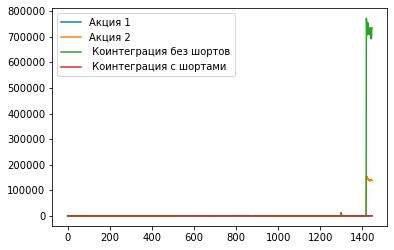

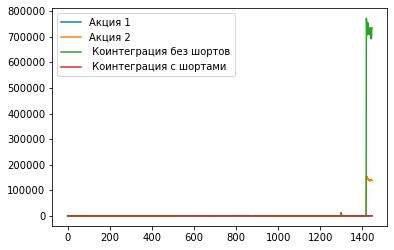



Оптимизационные коинтеграционные стратегии



Пара 1
Т-статистика коинтеграционного теста -3.1584
Годовая доходность первой акции 26.28%
Годовой риск первой акции 125.25%

Годовая доходность второй акции 247.69%
Годовой риск второй акции 124239.03%

Годовая доходность коинтеграционной стратегии без коротких позиций 264.22%
Годовой риск коинтеграционной стратегии без коротких позиций 124239.02%

Годовая доходность коинтеграционной стратегии с короткими позициями -65.25%
Годовой риск коинтеграционной стратегии с короткими позициями 124239.26%



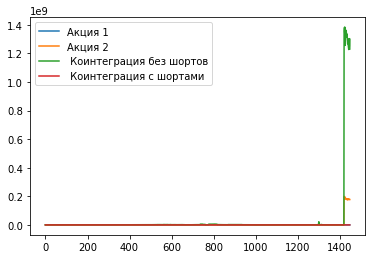



Оптимизационные коинтеграционные стратегии



Пара 1
Т-статистика коинтеграционного теста -3.1584
Годовая доходность первой акции 26.28%
Годовой риск первой акции 125.25%

Годовая доходность второй акции 247.69%
Годовой риск второй акции 124239.03%

Годовая доходность коинтеграционной стратегии без коротких позиций 264.22%
Годовой риск коинтеграционной стратегии без коротких позиций 124239.02%

Годовая доходность коинтеграционной стратегии с короткими позициями -65.25%
Годовой риск коинтеграционной стратегии с короткими позициями 124239.26%



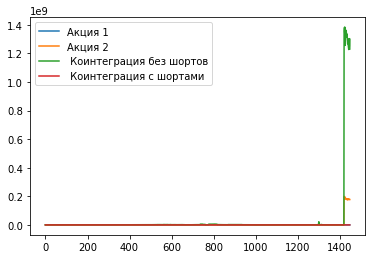



Средняя доходность акций 136.99%

Средняя доходность наивных стратегий без коротких позиций 367.16%

Средняя доходность наивных стратегий с короткими позициями -49.0%

Средняя доходность оптимизационных стратегий без коротких позиций 264.22%

Средняя доходность оптимизационных стратегий с короткими позициями -65.25%


Средняя доходность акций 136.99%

Средняя доходность наивных стратегий без коротких позиций 367.16%

Средняя доходность наивных стратегий с короткими позициями -49.0%

Средняя доходность оптимизационных стратегий без коротких позиций 264.22%

Средняя доходность оптимизационных стратегий с короткими позициями -65.25%


In [20]:
print('Новые коинтеграционные стратегии')

for i in range(0, len_coins_pairs):
    coint = pd.DataFrame()
    coint[0] = raw_data[2*i]
    coint[1] = raw_data[2*i+1]
    coint[2] = coint[0]
    coint[3] = coint[1]
    coint[2] = np.append(np.array(coint[0][1:])/np.array(coint[0][:data_set_shape])-1, 0)
    coint[3] = np.append(np.array(coint[1][1:])/np.array(coint[1][:data_set_shape])-1, 0)
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(coint[1], coint[0])
    alpha = intercept
    beta = slope
    
    coint[4] = coint[0] - (coint[1]*beta +alpha)
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(np.array(coint[4][:data_set_shape]), np.array(coint[4][1:])-np.array(coint[4][:data_set_shape]))
    coint[5] = coint[2] * (coint[4]<0) + coint[3]*(coint[4]>0)
    coint[6] = -coint[2]*np.sign(coint[4]) + coint[3]*np.sign(coint[4])
    
    bh1 = np.exp(np.sum(np.log(1+coint[2])) * traiding_days/data_set_shape)-1
    bh1r = np.std(coint[2]*traiding_days**(1/2))
    stock.append(bh1)
    bh2 = np.exp(np.sum(np.log(1+coint[3])) * traiding_days/data_set_shape)-1
    bh2r = np.std(coint[3]*traiding_days**(1/2))
    stock.append(bh2)
    strat1 = np.exp(np.sum(np.log(1+coint[5])*traiding_days/data_set_shape))-1
    strat1r = np.std(coint[5]*traiding_days**(1/2))
    naive1.append(strat1)
    strat2 = np.exp(np.sum(np.log(1+coint[6])*traiding_days/data_set_shape))-1
    strat2r = np.std(coint[6]*traiding_days**(1/2))
    naive2.append(strat2)   
    bh1p = []
    bh2p = []
    strat1p = []
    strat2p = []
    p1 = 100
    p2 = 100
    p3 = 100
    p4 = 100
    for j in range(1, data_set_shape+1):
        bh1p.append(p1)
        bh2p.append(p2)
        strat1p.append(p3)
        strat2p.append(p4)
        p1 = p1*(1+coint[2][j])
        p2 = p2*(1+coint[3][j])
        p3 = p3*(1+coint[5][j])
        p4 = p4*(1+coint[6][j])
        
    print()
    print('Пара ' + str(i+1))
    print('Т-статистика коинтеграционного теста ' + str(round(slope/stderr, 4)))
    print('Годовая доходность первой акции ' + str(round(bh1*100,2))+ '%')
    print('Годовой риск первой акции ' + str(round(bh1r*100,2))+'%')
    print()
    print('Годовая доходность второй акции ' + str(round(bh2*100,2))+ '%')
    print('Годовой риск второй акции ' + str(round(bh2r*100,2))+'%')
    print()
    print('Годовая доходность коинтеграционной стратегии без коротких позиций ' + str(round(strat1*100,2)) + '%')
    print('Годовой риск коинтеграционной стратегии без коротких позиций ' + str(round(strat1r*100,2)) + '%')
    print()
    print('Годовая доходность коинтеграционной стратегии с короткими позициями ' + str(round(strat2*100,2)) + '%')
    print('Годовой риск коинтеграционной стратегии с короткими позициями ' + str(round(strat2r*100,2)) + '%')
    print()        
    plt.plot(bh1p, label='Акция 1')
    plt.plot(bh2p, label='Акция 2')
    plt.plot(strat1p, label=' Коинтеграция без шортов')
    plt.plot(strat2p, label=' Коинтеграция с шортами')
    plt.legend()
    plt.show()
print()
print()    
print('Оптимизационные коинтеграционные стратегии')     
print()
print()         
for i in range(0, len_coins_pairs):
    coint = pd.DataFrame()
    coint[0] = raw_data[2*i]
    coint[1] = raw_data[2*i+1]
    coint[2] = coint[0]
    coint[3] = coint[1]
    coint[2] = np.append(np.array(coint[0][1:])/np.array(coint[0][:data_set_shape])-1, 0)
    coint[3] = np.append(np.array(coint[1][1:])/np.array(coint[1][:data_set_shape])-1, 0)
    def unitroot(k):
        a = np.average(coint[0] - coint[1]*k)
        comb = coint[0] - (coint[1]*k + a)
        slope, intercept, rvalue, pvalue, stderr = sps.linregress(np.array(comb[:data_set_shape]), np.array(comb[1:])-np.array(comb[:data_set_shape]))
        return slope/stderr
              
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(coint[1], coint[0])
    res = spop.minimize(unitroot, slope, method='Powell')
    beta = res.x
    alpha = np.average(coint[0] - coint[1]*beta)
    coint[4] = coint[0] - (coint[1]*beta +alpha)
    coint[5] = coint[2] * (coint[4]<0) + coint[3]*(coint[4]>0)
    coint[6] = -coint[2]*np.sign(coint[4]) + coint[3]*np.sign(coint[4])
    
    bh1 = np.exp(np.sum(np.log(1+coint[2])) * traiding_days/data_set_shape)-1
    bh1r = np.std(coint[2]*traiding_days**(1/2))
    stock.append(bh1)
    bh2 = np.exp(np.sum(np.log(1+coint[3])) * traiding_days/data_set_shape)-1
    bh2r = np.std(coint[3]*traiding_days**(1/2))
    stock.append(bh2)
    strat1 = np.exp(np.sum(np.log(1+coint[5])*traiding_days/data_set_shape))-1
    strat1r = np.std(coint[5]*traiding_days**(1/2))
    opt1.append(strat1)
    strat2 = np.exp(np.sum(np.log(1+coint[6])*traiding_days/data_set_shape))-1
    strat2r = np.std(coint[6]*traiding_days**(1/2))
    opt2.append(strat2)   
    bh1p = []
    bh2p = []
    strat1p = []
    strat2p = []          
    for j in range(1, data_set_shape+1):
        bh1p.append(p1)
        bh2p.append(p2)
        strat1p.append(p3)
        strat2p.append(p4)
        p1 = p1*(1+coint[2][j])
        p2 = p2*(1+coint[3][j])
        p3 = p3*(1+coint[5][j])
        p4 = p4*(1+coint[6][j])
        
    print()
    print('Пара ' + str(i+1))
    print('Т-статистика коинтеграционного теста ' + str(round(res.fun, 4)))
    print('Годовая доходность первой акции ' + str(round(bh1*100,2))+ '%')
    print('Годовой риск первой акции ' + str(round(bh1r*100,2))+'%')
    print()
    print('Годовая доходность второй акции ' + str(round(bh2*100,2))+ '%')
    print('Годовой риск второй акции ' + str(round(bh2r*100,2))+'%')
    print()
    print('Годовая доходность коинтеграционной стратегии без коротких позиций ' + str(round(strat1*100,2)) + '%')
    print('Годовой риск коинтеграционной стратегии без коротких позиций ' + str(round(strat1r*100,2)) + '%')
    print()
    print('Годовая доходность коинтеграционной стратегии с короткими позициями ' + str(round(strat2*100,2)) + '%')
    print('Годовой риск коинтеграционной стратегии с короткими позициями ' + str(round(strat2r*100,2)) + '%')
    print()        
    plt.plot(bh1p, label='Акция 1')
    plt.plot(bh2p, label='Акция 2')
    plt.plot(strat1p, label=' Коинтеграция без шортов')
    plt.plot(strat2p, label=' Коинтеграция с шортами')
    plt.legend()
    plt.show()
print()
print() 
print('Средняя доходность акций ' + str(round(np.average(stock)*100,2))+'%')
print()
print('Средняя доходность наивных стратегий без коротких позиций ' + str(round(np.average(naive1)*100,2))+'%')  
print()
print('Средняя доходность наивных стратегий с короткими позициями ' + str(round(np.average(naive2)*100,2))+'%')   
print()
print('Средняя доходность оптимизационных стратегий без коротких позиций ' + str(round(np.average(opt1)*100,2))+'%')  
print()
print('Средняя доходность оптимизационных стратегий с короткими позициями ' + str(round(np.average(opt2)*100,2))+'%')                     

In [4]:
def out_red(text):
    print("\033[31m {}".format(text))
def out_green(text):
    print("\033[32m {}".format(text))
def out_yellow(text):
    print("\033[33m {}".format(text))
def out_blue(text):
    print("\033[34m {}".format(text))
def out_black(text):
    print("\033[30m {}".format(text))
def out_turquoise(text):
    print("\033[36m {}".format(text))

def profit_calculate(reduced, deductible, profit, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots + float(profit)) - (
                float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

def profit_calculate_for_cycle(reduced, deductible, lots, taker, maker):
    profit = (float(reduced) * lots - float(deductible) * lots) - (float(reduced) * taker * lots + float(deductible) * maker * lots)
    return profit

In [5]:
def yf_download_2(coin, start, end, interval):
    df1 = yf.download(coin, start=start, end=end, interval=interval)#['Adj Close']
    df = pd.read_csv(f'{coin}.csv')
    df = df.set_index('datetime')
    last = str(list(df4.index.values)[-1])[:10]
    df = df[last:]
    df = df['close']
    df.drop([last], inplace = True)
    df1 = df1['Close']
    df = df.to_list()
    df = pd.DataFrame({coin: df})
    df1 = df1.to_list()
    df1 = pd.DataFrame({coin: df1})
    result = df1.append(df)
    result = result.reset_index(drop=True)
    print(result)
    return result

In [6]:
async def get_all_historical_candles(instrument, timeframe, start, end):
    """Запуск асинхронной задачи получения исторических данных для каждого тикера из портфеля."""
    with aiohttp.ClientSession() as session:
        strategy_tasks = []
        strategy_tasks.append(asyncio.create_task(get_candles(session, instrument, timeframe, start, end)))
        asyncio.gather(*strategy_tasks)
        asyncio.sleep(0.3)


def get_candles(session, ticker, timeframe, start, end):
    """Функция получения свечей с MOEX."""
    # print(ticker)
    interval = '1d'
    df1 = yf.download(f'{ticker}.ME', start=start, end=end, interval=interval)
    # print(len(df1))
    last = str(list(df1.index.values)[-1])[:10]
    df = aiomoex.get_market_candles(session, ticker, interval=timeframe, start=last,          end=end)
    # print(len(df))
    df = pd.DataFrame(df)
    df['datetime'] = pd.to_datetime(df['begin'], format='%Y-%m-%d %H:%M:%S')
    df = df[["datetime", "open", "high", "low", "close", "volume"]].copy()
    df = df.set_index('datetime')
    df = df[last:]
    df = df['close']
    df.drop([last], inplace=True)
    df1 = df1['Close']
    df = df.to_list()
    # print(len(df))
    df = pd.DataFrame({ticker: df})
    df1 = df1.to_list()
    df1 = pd.DataFrame({ticker: df1})
    # result = df1.append(df)
    result = pd.concat([df1, df], axis=0, join='inner')
    result = result.reset_index(drop=True)
    result.to_csv(f"{ticker}.ME.csv")
    # print(result)
    return result

In [7]:
start = '2019-08-30'
end = '2024-01-5'
interval = '1d'

In [8]:
stock_1 = 'QNT-USD'
stock_2 = 'PHB-USD'

In [36]:
# df1 = get_all_historical_candles(instrument=f'{stock_1}', start=start, end=end, timeframe=interval)
df1 = pd.read_csv(f'{stock_1}.ME.csv')
df1.drop([df1.columns[0]], axis=1, inplace=True)
# print(df1.columns)
# print(df1)
# df2 = get_all_historical_candles(instrument=f'{stock_2}', start=start, end=end, timeframe=interval)
df2 = pd.read_csv(f'{stock_2}.ME.csv')
df2.drop([df2.columns[0]], axis=1, inplace=True)

In [9]:
start = '2019-08-30'
end = '2024-01-5'
interval = '1d'
# ARB-USD	BAT-USD
df1 = yf_download(coin='QNT-USD', start=start, end=end, interval=interval)
df2 = yf_download(coin='PHB-USD', start=start, end=end, interval=interval)

[*********************100%***********************]  1 of 1 completed
         QNT-USD
0       5.918405
1       5.567307
2       5.626661
3       5.446316
4       5.752707
...          ...
1584  137.663025
1585  141.095383
1586  135.753082
1587  125.108940
1588  128.406616

[1589 rows x 1 columns]
[*********************100%***********************]  1 of 1 completed
       PHB-USD
0     0.005889
1     0.005480
2     0.005458
3     0.005625
4     0.005572
...        ...
1584  1.009507
1585  1.068499
1586  1.067983
1587  0.877446
1588  0.936515

[1589 rows x 1 columns]


In [11]:
# df1, df2, df17, df18, df17, df19

years_test = 1
trade_period = (int(end[:4]) - int(start[:4]))
# trade_period = ceil((int(end[:4]) - int(start[:4]))/years_test)

df_len = df1
is_position_first, is_position_second = False, False
test_part = ceil(len(df_len)/trade_period*years_test)
train_part = len(df_len) - test_part
data_set_shape = df1.shape[0]
maker = 0.00035 # 0.000162
taker = 0.00035 # 0.000324
start_sum = 10000
profit = 0
coint_4_changes = pd.DataFrame()
trade_number = 0


coint = pd.DataFrame()
coint[0] = df1
coint[1] = df2

for i in prange(train_part, len(df_len)):
#     print(i)
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(coint[1][:i], coint[0][:i])
    alpha = intercept
    beta = slope
    coint_4 = coint[0][:i] - (coint[1][:i]*beta +alpha)
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(np.array(coint_4[:i-1]), np.array(coint_4[1:])-np.array(coint_4[:i-1]))

#     if trade_number > 0:
#         print(coint_4.iloc[-1], coint[0][i], coint[1][i])
#         coint_4_changes[f'{trade_number}'] = 'NAN'
    
    if start_sum < 0:
        break
    
    if coint_4.iloc[-1] < 0 and is_position_first == False and is_position_second == True:
        is_position_second = False
        out_price = coint[1][i]
        profit = profit_calculate(reduced=out_price, deductible=enter_price, profit=profit, \
                            lots=lots, taker=taker, maker=maker)
        profit_for_cycle = profit_calculate_for_cycle(reduced=out_price, deductible=enter_price, \
                            lots=lots, taker=taker, maker=maker)
        start_sum += profit_for_cycle
#         print(out_price, enter_price, lots)
        out_red(f'Продали акцию_2 по цене {out_price}, заработок со сделки {profit_for_cycle}')
#         print(coint_4.iloc[-1])
        out_blue(f'Заработали всего {profit}, итоговая сумма {start_sum}, кол-во лотов {lots}')
        print()
    
    if coint_4.iloc[-1] > 0 and is_position_first == True and is_position_second == False:
        is_position_first = False
        out_price = coint[0][i]
        profit = profit_calculate(reduced=out_price, deductible=enter_price, profit=profit, \
                            lots=lots, taker=taker, maker=maker)
        profit_for_cycle = profit_calculate_for_cycle(reduced=out_price, deductible=enter_price, \
                            lots=lots, taker=taker, maker=maker)
        start_sum += profit_for_cycle
        out_red(f'Продали акцию_1 по цене {out_price}, заработок со сделки {profit_for_cycle}')
#         print(coint_4.iloc[-1])
        out_blue(f'Заработали всего {profit}, итоговая сумма {start_sum}, кол-во лотов {lots}')
        print()
    
    if coint_4.iloc[-1] < 0 and coint_4.iloc[-2] > 0 and is_position_first == False and is_position_second == False:
        lots = start_sum / coint[0][i]
        enter_price = coint[0][i]
        is_position_first = True
        out_green(f'Купили акцию_1 по цене {enter_price}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots}')
        out_yellow('Т-статистика коинтеграционного теста ' + str(round(slope/stderr, 4)))
        trade_number+=1
        
    if coint_4.iloc[-1] > 0 and coint_4.iloc[-2] < 0 and is_position_first == False and is_position_second == False:
        lots = start_sum / coint[1][i]
        enter_price = coint[1][i]
        is_position_second = True
        out_green(f'Купили акцию_2 по цене {enter_price}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots}')
        out_yellow('Т-статистика коинтеграционного теста ' + str(round(slope/stderr, 4)))
        trade_number+=1
#     print(coint[1][i])
#         coint_4_changes[f'{trade_number}'] = 'NAN'


 Купили акцию_2 по цене 0.6191359758377075, зашли по coint_4 3.995499106827637, кол-во лотов 16151.540841201697
 Т-статистика коинтеграционного теста -1.8712
 Продали акцию_2 по цене 0.6098679900169373, заработок со сделки -156.63985921182464
 Заработали всего -156.63985921182464, итоговая сумма 9843.360140788176, кол-во лотов 16151.540841201697

 Купили акцию_1 по цене 100.6189193725586, зашли по coint_4 -3.883437816960253, кол-во лотов 97.82812419542559
 Т-статистика коинтеграционного теста -1.8726
 Продали акцию_1 по цене 111.03968811035156, заработок со сделки 1012.1971007036644
 Заработали всего 855.5572414918398, итоговая сумма 10855.55724149184, кол-во лотов 97.82812419542559

 Купили акцию_2 по цене 0.5949199795722961, зашли по coint_4 4.481706455240555, кол-во лотов 18247.08803576607
 Т-статистика коинтеграционного теста -1.9007
 Продали акцию_2 по цене 0.5722370147705078, заработок со сделки -421.35208139998053
 Заработали всего 434.2051600918593, итоговая сумма 10434.2051600

In [21]:
years_test = 1
trade_period = (int(end[:4]) - int(start[:4]))

df_len = df1
is_position_first, is_position_second = False, False
test_part = ceil(len(df_len)/trade_period*years_test)
train_part = len(df_len) - test_part
# enter_price = 0
# out_price = 0
maker = 0.00035 # 0.000162
taker = 0.00035 # 0.000324
start_sum = 5000
profit = 0

coint = pd.DataFrame()
coint[0] = df1
coint[1] = df2

for i in prange(train_part, len(df_len)+1):
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(coint[1][:i], coint[0][:i])
    alpha = intercept
    beta = slope
    coint_4 = coint[0][:i] - (coint[1][:i]*beta +alpha)
    
    if start_sum < 0:
        print('Закрылись по стопу')        
        break
        
    print(i, coint[0][i], coint[1][i])    
    
    if (is_position_first == True or is_position_second == True) and coint_4.iloc[-1] / enter_price_sell >= 2:
#         print(profit_calculate(reduced=enter_price_sell, deductible=coint_4.iloc[-1], profit=profit, \
#                     lots=lots_sell, taker=taker, maker=maker))
#         print(enter_price_sell*100, coint_4.iloc[-1], enter_price_sell*100>coint_4.iloc[-1])
        print('Закрылись по стопу')
        break
    
    if coint_4.iloc[-1] < 0 and is_position_first == False and is_position_second == True:
        is_position_second = False
        out_price_sell = coint[1][i]
        out_price_buy = coint[0][i]
        profit_1 = profit_calculate(reduced=out_price_sell, deductible=enter_price_buy, profit=profit, \
                            lots=lots_buy, taker=taker, maker=maker)
        profit_2 = profit_calculate(reduced=enter_price_sell, deductible=out_price_buy, profit=profit, \
                    lots=lots_sell, taker=taker, maker=maker)
        profit_for_cycle_1 = profit_calculate_for_cycle(reduced=out_price_sell, deductible=enter_price_buy, \
                            lots=lots_buy, taker=taker, maker=maker)
        profit_for_cycle_2 = profit_calculate_for_cycle(reduced=enter_price_sell, deductible=out_price_buy, \
                    lots=lots_sell, taker=taker, maker=maker)
        start_sum += profit_for_cycle_1
        start_sum += profit_for_cycle_2
#         print(out_price, enter_price, lots)
        out_red(f'Продали акцию_2 по цене {out_price_sell}, заработок со сделки {profit_for_cycle_1}')
        out_red(f'Купили акцию_1 по цене {out_price_buy}, заработок со сделки {profit_for_cycle_2}')
        out_blue(f'Заработали всего {profit_1+profit_2}, итоговая сумма {start_sum}')
        print()
    
    if coint_4.iloc[-1] > 0 and is_position_first == True and is_position_second == False:
        is_position_first = False
        out_price_sell = coint[0][i]
        out_price_buy = coint[1][i]
        profit_1 = profit_calculate(reduced=out_price_sell, deductible=enter_price_buy, profit=profit, \
                            lots=lots_buy, taker=taker, maker=maker)
        profit_2 = profit_calculate(reduced=enter_price_sell, deductible=out_price_buy, profit=profit, \
                    lots=lots_sell, taker=taker, maker=maker)
        profit_for_cycle_1 = profit_calculate_for_cycle(reduced=out_price_sell, deductible=enter_price_buy, \
                            lots=lots_buy, taker=taker, maker=maker)
        profit_for_cycle_2 = profit_calculate_for_cycle(reduced=enter_price_sell, deductible=out_price_buy, \
                    lots=lots_sell, taker=taker, maker=maker)
        start_sum += profit_for_cycle_1
        start_sum += profit_for_cycle_2
        out_red(f'Продали акцию_1 по цене {out_price_sell}, заработок со сделки {profit_for_cycle_1}')
        out_red(f'Купили акцию_2 по цене {out_price_buy}, заработок со сделки {profit_for_cycle_2}')
        out_blue(f'Заработали всего {profit_1+profit_2}, итоговая сумма {start_sum}')
        print()
    
    if coint_4.iloc[-1] < 0 and coint_4.iloc[-2] > 0 and is_position_first == False and is_position_second == False:
        lots_buy = start_sum / coint[0][i]
        lots_sell = start_sum / coint[1][i]
        enter_price_buy = coint[0][i]
        enter_price_sell = coint[1][i]
        is_position_first = True
        out_green(f'Купили акцию_1 по цене {enter_price_buy}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots_buy}')
        out_green(f'Продали акцию_2 по цене {enter_price_sell}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots_sell}')

    if coint_4.iloc[-1] > 0 and coint_4.iloc[-2] < 0 and is_position_first == False and is_position_second == False:
        lots_buy = start_sum / coint[1][i]
        lots_sell = start_sum / coint[0][i]
        enter_price_buy = coint[1][i]
        enter_price_sell = coint[0][i]
        is_position_second = True
        out_green(f'Купили акцию_2 по цене {enter_price_buy}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots_buy}')
        out_green(f'Продали акцию_1 по цене {enter_price_sell}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots_sell}')

1139 0.00038300000596791506 270.97100830078125
1140 0.000387999985832721 271.8514099121094
1141 0.00038400001358240843 269.5671691894531
1142 0.0003809999907389283 268.4040832519531
1143 0.00038499999209307134 272.51995849609375
1144 0.0003910000086762011 275.5125732421875
1145 0.0003870000073220581 273.2145690917969
1146 0.00038300000596791506 271.9813537597656
1147 0.0003809999907389283 269.2712707519531
1148 0.00038300000596791506 270.0384216308594
1149 0.00038400001358240843 270.4794921875
1150 0.0003910000086762011 276.0081787109375
1151 0.0003870000073220581 273.9774169921875
1152 0.0004020000051241368 284.4325256347656
1153 0.0004149999876972288 290.3769836425781
1154 0.00040600000647827983 286.8441162109375
1155 0.00041199999395757914 298.0141906738281
1156 0.00041599999531172216 304.21795654296875
1157 0.0004130000015720725 313.7547912597656
1158 0.00041000000783242285 326.3607177734375
1159 0.00041000000783242285 324.5794372558594
1160 0.0004030000127386302 320.1505432128906


1401 0.000623999978415668 247.75942993164062
1402 0.0005890000029467046 246.25791931152344
1403 0.0005460000247694552 246.38221740722656
1404 0.0004980000085197389 242.492919921875
1405 0.00048099999548867345 239.08108520507812
1406 0.0003969999961555004 232.31942749023438
1407 0.00041199999395757914 235.62115478515625
1408 0.00039400000241585076 236.28738403320312
1409 0.0003229999856557697 234.22836303710938
1410 0.0003420000139158219 245.874267578125
1411 0.0003530000103637576 248.538330078125
1412 0.0002570000069681555 244.01988220214844
1413 0.0003800000122282654 256.48968505859375
1414 0.000446999998530373 248.19161987304688
1415 0.00037200000951997936 251.09970092773438
1416 0.000387999985832721 242.65682983398438
1417 0.0004670000053010881 244.35299682617188
1418 0.00043399998685345054 240.2649383544922
1419 1.2933839559555054 241.1608123779297
1420 1.2836840152740479 242.73313903808594
 Продали акцию_1 по цене 1.2836840152740479, заработок со сделки 29910836.54096446
 Купили а

KeyError: 1519

In [21]:
def transformation(train_part, second_part, third_part):
#     print(f'train_part: {train_part}, second_part: {second_part}, third_part: {third_part}')
    coint = list(train_part)
    coint.append(second_part)
    coint.append(third_part)
    coint = pd.Series(coint)
#     print(coint)
    return coint

In [49]:
years_test = 1.5
trade_period = (int(end[:4]) - int(start[:4]))

df_len = df1
is_position_first, is_position_second = False, False
test_part = ceil(len(df_len)/trade_period*years_test)
train_part = len(df_len) - test_part
data_set_shape = df1.shape[0]
maker = 0.00035 # 0.000162
taker = 0.00035 # 0.000324
start_sum = 10000
profit = 0


coint = pd.DataFrame()
coint[0] = df1
coint[1] = df2

for i in prange(train_part, len(df_len)):
    coint_5 = transformation(coint[0][:train_part], coint[0][i-1], coint[0][i])
    coint_6 = transformation(coint[1][:train_part], coint[1][i-1], coint[1][i])
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(list(coint_6)[:i], list(coint_5)[:i])
    alpha = intercept
    beta = slope
    coint_4 = coint_5[:train_part+2] - (coint_6[:train_part+2]*beta +alpha)
    a = len(coint_4)
#     print(coint_4)
#     print(len(np.array(coint_4[1:])))
#     print(len(np.array(coint_4[:i-1])))
    slope, intercept, rvalue, pvalue, stderr = sps.linregress(np.array(coint_4[:a-1]), np.array(coint_4[1:])-np.array(coint_4[:a-1]))

    if start_sum < 0:
        break
    
    if coint_4.iloc[-1] < 0 and is_position_first == False and is_position_second == True:
        is_position_second = False
        out_price = coint[1][i]
        profit = profit_calculate(reduced=out_price, deductible=enter_price, profit=profit, \
                            lots=lots, taker=taker, maker=maker)
        profit_for_cycle = profit_calculate_for_cycle(reduced=out_price, deductible=enter_price, \
                            lots=lots, taker=taker, maker=maker)
        start_sum += profit_for_cycle
#         print(out_price, enter_price, lots)
        out_red(f'Продали акцию_2 по цене {out_price}, заработок со сделки {profit_for_cycle}')
#         print(coint_4.iloc[-1])
        out_blue(f'Заработали всего {profit}, итоговая сумма {start_sum}, кол-во лотов {lots}')
        print()
    
    if coint_4.iloc[-1] > 0 and is_position_first == True and is_position_second == False:
        is_position_first = False
        out_price = coint[0][i]
        profit = profit_calculate(reduced=out_price, deductible=enter_price, profit=profit, \
                            lots=lots, taker=taker, maker=maker)
        profit_for_cycle = profit_calculate_for_cycle(reduced=out_price, deductible=enter_price, \
                            lots=lots, taker=taker, maker=maker)
        start_sum += profit_for_cycle
        out_red(f'Продали акцию_1 по цене {out_price}, заработок со сделки {profit_for_cycle}')
#         print(coint_4.iloc[-1])
        out_blue(f'Заработали всего {profit}, итоговая сумма {start_sum}, кол-во лотов {lots}')
        print()
    
    if coint_4.iloc[-1] < 0 and coint_4.iloc[-2] > 0 and is_position_first == False and is_position_second == False:
        lots = start_sum / coint[0][i]
        enter_price = coint[0][i]
        is_position_first = True
        out_green(f'Купили акцию_1 по цене {enter_price}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots}')
        out_yellow('Т-статистика коинтеграционного теста ' + str(round(slope/stderr, 4)))
        
    if coint_4.iloc[-1] > 0 and coint_4.iloc[-2] < 0 and is_position_first == False and is_position_second == False:
        lots = start_sum / coint[1][i]
        enter_price = coint[1][i]
        is_position_second = True
        out_green(f'Купили акцию_2 по цене {enter_price}, зашли по coint_4 {coint_4.iloc[-1]}, кол-во лотов {lots}')
        out_yellow('Т-статистика коинтеграционного теста ' + str(round(slope/stderr, 4)))        


In [52]:
# 99.674.245 - 15.000 + 86.747 - 30.000 + 43.900 - 35.000 
99674245 - 15000 + 86747 - 30000 + 43900 - 35000

99724892

In [53]:
86747 - 30000 + 43900 - 35000

65647

In [ ]:
# Избранные пары: HOT-RLC (по третьей стратегии); 

In [ ]:
df = pd.read_csv('Test_trading_crypto.csv')
df.loc[(df['Монета_1'] == 'BTC-USD') & (df['Монета_2'] == 'LINK-USD')]

In [ ]:
for i in range(0, len_coins_pairs):
    print()
    print('Пара ' + str(i+1))
    print()
    betas = []
    tstats = []
    rets1 = []
    rets2 = []
    for beta in np.arange(-50, 50, 0.1):
        alpha = np.average(raw_data[2*i] - raw_data[2*i+1]*beta)
        comb = raw_data[2*i] - (raw_data[2*i+1]*beta + alpha)
        slope, intercept, rvalue, pvalue, stderr = sps.linregress(np.array(comb[:data_set_shape]), np.array(comb[1:])-np.array(comb[:data_set_shape]))
        r1 = np.append(np.array(raw_data[2*i][1:])/np.array(raw_data[2*i][:data_set_shape])-1,0)
        r2 = np.append(np.array(raw_data[2*i+1][1:])/np.array(raw_data[2*i+1][:data_set_shape])-1,0)
        noshort = r1*(comb<0) + r2*(comb>0)
        short = -r1*np.sign(comb) + r2*np.sign(comb)
        strat1 = np.exp(np.sum(np.log(1+noshort))*252/data_set_shape)-1
        strat2 = np.exp(np.sum(np.log(1+short))*252/data_set_shape)-1
        betas.append(beta)
        tstats.append(slope/stderr)
        rets1.append(strat1)
        rets2.append(strat2)
    plt.plot(betas, tstats)
    plt.show()
    plt.scatter(tstats, rets1)
    plt.scatter(tstats, rets2)
    plt.show()

In [ ]:
# df1 = yf.download(f'CHR-USD', start=start, end=end)['Adj Close']
# df2 = yf.download(f'IMX-USD', start=start, end=end)['Adj Close']  
# df3 = yf.download(f'IOTX-USD', start=start, end=end)['Adj Close']  
# df4 = yf.download(f'ARPA-USD', start=start, end=end)['Adj Close']  
# df5 = yf.download(f'WOO-USD', start=start, end=end)['Adj Close']  
# df6 = yf.download(f'BNX-USD', start=start, end=end)['Adj Close']  
# df7 = yf.download(f'LQTY-USD', start=start, end=end)['Adj Close']  
# df8 = yf.download(f'JASMY-USD', start=start, end=end)['Adj Close']  
# df9 = yf.download(f'BTC-USD', start=start, end=end)['Adj Close']  
# df10 = yf.download(f'ETH-USD', start=start, end=end)['Adj Close'] 

# df1 = yf_rename(df1, 'CHR')
# df2 = yf_rename(df2, 'IMX')
# df3 = yf_rename(df3, 'IOTX')
# df4 = yf_rename(df4, 'ARPA')
# df5 = yf_rename(df5, 'WOO')
# df6 = yf_rename(df6, 'BNX')
# df7 = yf_rename(df7, 'LQTY')
# df8 = yf_rename(df8, 'JASMY')
# df9 = yf_rename(df9, 'BTC')
# df10 = yf_rename(df10, 'ETH')


# df1 = yf_rename(df1, 'DEFI')
# df2 = yf_rename(df2, 'ANKR')
# df3 = yf_rename(df3, 'CHZ')
# df4 = yf_rename(df4, 'CVC')
# df5 = yf_rename(df5, 'FET')
# df6 = yf_rename(df6, 'NKN')
# df7 = yf_rename(df7, 'STMX')
# df8 = yf_rename(df8, 'MTL')
# df9 = yf_rename(df9, 'BTC')
# df10 = yf_rename(df10, 'ETH')

In [ ]:
df_crypto = pd.read_csv('Cointegration_Test_in_python_crypto_2.csv')
df_crypto

In [ ]:
df_crypto.loc[(df_crypto['Показатель'] <= -13.8) & (df_crypto['Монета_1'] != 'GMX') & (df_crypto['Монета_1'] != 'USDC') & (df_crypto['Монета_2'] != 'GMX') & (df_crypto['Монета_2'] != 'USDC')]

In [34]:
df_moex = pd.read_csv('Cointegration_Test_in_python_MOEX.csv')
df_moex

,Монета_1,Монета_2,Показатель
0,CBOM,POLY,-2.50
1,CBOM,YNDX,-2.19
2,CBOM,ALRS,-3.24
3,CBOM,VTBR,-2.95
4,CBOM,RUAL,-2.50
...,...,...,...
52815,ARSA,SAGO,-1.62
52816,ARSA,SAGOP,-1.50
52817,ARSA,SLEN,NaN
52818,ARSA,PRMB,-1.35


,Монета_1,Монета_2,Показатель
0,CBOM,POLY,-2.50
1,CBOM,YNDX,-2.19
2,CBOM,ALRS,-3.24
3,CBOM,VTBR,-2.95
4,CBOM,RUAL,-2.50
...,...,...,...
52815,ARSA,SAGO,-1.62
52816,ARSA,SAGOP,-1.50
52817,ARSA,SLEN,NaN
52818,ARSA,PRMB,-1.35


In [37]:
df_moex.loc[(df_moex['Монета_1'] == 'DIOD') & (df_moex['Монета_2'] == 'KAZT')]

,Монета_1,Монета_2,Показатель
49515,DIOD,KAZT,-2.01


,Монета_1,Монета_2,Показатель
49515,DIOD,KAZT,-2.01


In [ ]:
df_moex.loc[(df_moex['Показатель'] <= -8.5)]

In [440]:
df_usa = pd.read_csv('Cointegration_Test_in_python_USA.csv')
# df_usa

In [441]:
df_usa

,Монета_1,Монета_2,Показатель
0,BNGO,SKLZ,-2.15
1,BNGO,TRI,-2.39
2,BNGO,SBGI,-2.34
3,BNGO,TECL,-1.56
4,BNGO,TNA,-2.15
...,...,...,...
932702,LFST,OKTA,-2.88
932703,LFST,AXSM,-2.77
932704,LFST,CARS,-2.79
932705,LFST,DBX,-2.92


In [442]:
df_usa.loc[(df_usa['Показатель'] <= -8)]

,Монета_1,Монета_2,Показатель
23610,SPXU,SPXS,-8.35
45217,SPXS,SPXU,-8.35
55010,BIL,FSLR,-8.25
141625,SPLG,IVV,-19.88
141626,SPLG,VOO,-20.68
192728,SCHB,VTI,-8.59
192748,SCHB,ITOT,-10.83
259477,IVV,SPLG,-19.88
259537,IVV,VOO,-21.05
261442,VOO,SPLG,-20.68


In [8]:
df_test_crypto = pd.read_csv('Test_trading_crypto.csv')
df_test_crypto

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
0,2,crypto,strategy_one,BTC-USD,BCH-USD,-2.1888,10000,10000.0000,0.0000
1,2,crypto,strategy_two,BTC-USD,BCH-USD,-2.1888,10000,10000.0000,0.0000
2,2,crypto,strategy_three,BTC-USD,BCH-USD,-2.7309,10000,10000.0000,0.0000
3,2,crypto,strategy_one,BTC-USD,XRP-USD,-3.4567,10000,9024.6112,-9.7539
4,2,crypto,strategy_two,BTC-USD,XRP-USD,-3.4567,10000,21366.2750,113.6628
...,...,...,...,...,...,...,...,...,...
11410,2,crypto,strategy_two,MDT-USD,KEY-USD,-6.1618,10000,167953.4135,1579.5341
11411,2,crypto,strategy_three,MDT-USD,KEY-USD,-6.5145,10000,17517.6180,75.1762
11412,2,crypto,strategy_one,MDT-USD,NMR-USD,-3.4246,10000,4550.7380,-54.4926
11413,2,crypto,strategy_two,MDT-USD,NMR-USD,-3.4246,10000,8625.8686,-13.7413


In [12]:
df_test_crypto.loc[(df_test_crypto['Монета_1'] == 'KAS-USD')]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах


In [402]:
df_test_crypto.loc[(df_test_crypto['Заработок в процентах'] >= 100000000) & (df_test_crypto['Тип стратегии'] == 'strategy_three')]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
3257,2,crypto,strategy_three,BAT-USD,ARB-USD,-1.85,10000,13519561281.89,135195512.82
4073,2,crypto,strategy_three,ZIL-USD,ARB-USD,-1.80,10000,10301014076.50,103010040.77
5549,2,crypto,strategy_three,ICX-USD,ARB-USD,-1.78,10000,12323223424.17,123232134.24
10358,2,crypto,strategy_three,ARB-USD,ZEC-USD,-1.93,10000,30744569227.41,307445592.27
10373,2,crypto,strategy_three,ARB-USD,BAT-USD,-1.96,10000,16766627174.45,167666171.74
10391,2,crypto,strategy_three,ARB-USD,ZRX-USD,-1.96,10000,10952056200.21,109520462.00


In [363]:
df_test_moex = pd.read_csv('Test_trading_MOEX.csv')
df_test_moex

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
0,4,MOEX,strategy_one,CBOM.ME,POLY.ME,-2.15,10000,5174.48,-48.26
1,4,MOEX,strategy_two,CBOM.ME,POLY.ME,-2.15,10000,2230.63,-77.69
2,4,MOEX,strategy_three,CBOM.ME,POLY.ME,-1.63,10000,10397.34,3.97
3,4,MOEX,strategy_one,CBOM.ME,YNDX.ME,-2.24,10000,4238.90,-57.61
4,4,MOEX,strategy_two,CBOM.ME,YNDX.ME,-2.24,10000,6777.48,-32.23
...,...,...,...,...,...,...,...,...,...
129856,4,MOEX,strategy_two,ARSA.ME,PRMB.ME,-4.34,10000,24749.84,147.50
129857,4,MOEX,strategy_three,ARSA.ME,PRMB.ME,-3.90,10000,13401.73,34.02
129858,4,MOEX,strategy_one,ARSA.ME,KMEZ.ME,-4.31,10000,28779.28,187.79
129859,4,MOEX,strategy_two,ARSA.ME,KMEZ.ME,-4.31,10000,21715.89,117.16


In [377]:
df_test_moex.loc[(df_test_moex['Заработок в процентах'] >= 2000) & (df_test_moex['Тип стратегии'] == 'strategy_three')]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
8678,4,MOEX,strategy_three,DSKY.ME,UNKL.ME,-2.63,10000,210507.48,2005.07
44411,4,MOEX,strategy_three,BLNG.ME,VRSB.ME,-4.26,10000,242388.86,2323.89
55568,4,MOEX,strategy_three,VGSBP.ME,VRSBP.ME,-3.68,10000,223823.87,2138.24
64340,4,MOEX,strategy_three,IGSTP.ME,YAKG.ME,-4.25,10000,238285.61,2282.86
97634,4,MOEX,strategy_three,VRSB.ME,BLNG.ME,-5.25,10000,311605.00,3016.05
97646,4,MOEX,strategy_three,VRSB.ME,MGNZ.ME,-3.44,10000,242570.12,2325.70
128765,4,MOEX,strategy_three,KMEZ.ME,FESH.ME,-2.42,10000,212835.70,2028.36


In [3]:
pd.set_option("display.float_format", "{:.2f}".format)

In [4]:
df_test_usa = pd.read_csv('Test_trading_USA.csv')
df_test_usa

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
0,4,USA,strategy_one,TRI,SBGI,-0.79,10000,10000.00,0.00
1,4,USA,strategy_two,TRI,SBGI,-0.79,10000,10000.00,0.00
2,4,USA,strategy_three,TRI,SBGI,3.68,10000,10000.00,0.00
3,4,USA,strategy_one,TRI,TECL,-2.13,10000,25952.77,159.53
4,4,USA,strategy_two,TRI,TECL,-2.13,10000,13868.75,38.69
...,...,...,...,...,...,...,...,...,...
465501,4,USA,strategy_two,VOO,VGK,-2.56,10000,10173.36,1.73
465502,4,USA,strategy_three,VOO,VGK,-0.14,10000,10000.00,0.00
465503,4,USA,strategy_one,VOO,VXF,-0.89,10000,14852.82,48.53
465504,4,USA,strategy_two,VOO,VXF,-0.89,10000,10728.05,7.28


In [21]:
df_test_usa.loc[(df_test_usa['Заработок в процентах'] >= 8000) & (df_test_usa['Тип стратегии'] == 'strategy_one')]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
64992,4,USA,strategy_one,AWH,MARA,-1.81,10000,1087760.73,10777.61
197193,4,USA,strategy_one,QUAL,MVIS,-1.92,10000,855366.92,8453.67
205737,4,USA,strategy_one,SPLG,MVIS,-1.85,10000,851525.54,8415.26
282288,4,USA,strategy_one,IWB,MVIS,-1.87,10000,841521.80,8315.22
307998,4,USA,strategy_one,VOT,MVIS,-2.46,10000,834085.40,8240.85
316521,4,USA,strategy_one,SCHB,MVIS,-1.91,10000,854685.49,8446.85
461871,4,USA,strategy_one,IVV,MVIS,-1.75,10000,851374.62,8413.75


In [48]:
df_test_crypto_second = pd.read_csv('Test_trading_crypto_strategy_two_2.csv')
df_test_crypto_second

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
0,2,crypto,strategy_two,BTC-USD,BCH-USD,-2.1888,10000,10000.0,0.0
1,2,crypto,strategy_two,BTC-USD,XRP-USD,-2.2213,10000,0.0,-100.0
2,2,crypto,strategy_two,BTC-USD,EOS-USD,-1.7369,10000,10000.0,0.0
3,2,crypto,strategy_two,BTC-USD,LTC-USD,-3.6064,10000,0.0,-100.0
4,2,crypto,strategy_two,BTC-USD,TRX-USD,-2.3200,10000,0.0,-100.0
...,...,...,...,...,...,...,...,...,...
3869,2,crypto,strategy_two,MDT-USD,ARB-USD,-3.1319,10000,0.0,-100.0
3870,2,crypto,strategy_two,MDT-USD,AMB-USD,-2.9329,10000,0.0,-100.0
3871,2,crypto,strategy_two,MDT-USD,IDEX-USD,-3.9007,10000,0.0,-100.0
3872,2,crypto,strategy_two,MDT-USD,KEY-USD,-5.2935,10000,0.0,-100.0


In [52]:
df_test_crypto_second.loc[(df_test_crypto_second['Заработок в процентах'] >= 10000)]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
2878,2,crypto,strategy_two,DENT-USD,ARB-USD,-2.4038,10000,4.370595e+06,4.360595e+04
3490,2,crypto,strategy_two,USDC-USD,HOT-USD,-16.8975,10000,2.211469e+06,2.201469e+04
3505,2,crypto,strategy_two,ARB-USD,BTC-USD,-1.4514,10000,5.645203e+09,5.645193e+07
3515,2,crypto,strategy_two,ARB-USD,XMR-USD,-1.4486,10000,5.933267e+09,5.933257e+07
3519,2,crypto,strategy_two,ARB-USD,BNB-USD,-1.4486,10000,9.112374e+09,9.112364e+07
3557,2,crypto,strategy_two,ARB-USD,QNT-USD,-1.4588,10000,4.274044e+09,4.274034e+07
3561,2,crypto,strategy_two,ARB-USD,USDC-USD,-1.5010,10000,3.106479e+09,3.106469e+07


In [44]:
df_test_moex_second = pd.read_csv('Test_trading_moex_strategy_two.csv')
df_test_moex_second

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
0,4,MOEX,strategy_two,CBOM.ME,POLY.ME,-2.15,10000,2230.63,-77.69
1,4,MOEX,strategy_two,CBOM.ME,YNDX.ME,-2.24,10000,6777.48,-32.23
2,4,MOEX,strategy_two,CBOM.ME,ALRS.ME,-2.57,10000,14315.20,43.15
3,4,MOEX,strategy_two,CBOM.ME,VTBR.ME,-1.98,10000,8021.38,-19.79
4,4,MOEX,strategy_two,CBOM.ME,RUAL.ME,-2.10,10000,37059.87,270.60
...,...,...,...,...,...,...,...,...,...
43284,4,MOEX,strategy_two,ARSA.ME,MAGEP.ME,-1.63,10000,5961.85,-40.38
43285,4,MOEX,strategy_two,ARSA.ME,SAGO.ME,-3.32,10000,10787.21,7.87
43286,4,MOEX,strategy_two,ARSA.ME,SAGOP.ME,-2.97,10000,6184.06,-38.16
43287,4,MOEX,strategy_two,ARSA.ME,PRMB.ME,-4.34,10000,24749.83,147.50


In [48]:
df_test_moex_second.loc[(df_test_moex_second['Заработок в процентах'] >= 5000)]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
18675,4,MOEX,strategy_two,VSYD.ME,ZILL.ME,-5.10,10000,522229.56,5122.30
18744,4,MOEX,strategy_two,VSYD.ME,KRKOP.ME,-5.54,10000,612831.94,6028.32


In [77]:
df_test_usa_second = pd.read_csv('Test_trading_USA_strategy_two_2.csv')
df_test_usa_second

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
0,4,USA,strategy_two,TRI,SBGI,-0.4615,10000,10000.0000,0.0000
1,4,USA,strategy_two,TRI,TECL,-1.9233,10000,20367.3807,103.6738
2,4,USA,strategy_two,TRI,TNA,1.4013,10000,10000.0000,0.0000
3,4,USA,strategy_two,TRI,NUGT,-0.8953,10000,10000.0000,0.0000
4,4,USA,strategy_two,TRI,XLY,-1.2205,10000,11153.0923,11.5309
...,...,...,...,...,...,...,...,...,...
210542,4,USA,strategy_two,ANGL,PARA,-2.1746,10000,8168.6814,-18.3132
210543,4,USA,strategy_two,ANGL,EXC,-1.8921,10000,10202.0155,2.0202
210544,4,USA,strategy_two,ANGL,NEM,-3.0020,10000,13909.4740,39.0947
210545,4,USA,strategy_two,ANGL,MET,-2.0426,10000,16391.2890,63.9129


In [79]:
df_test_usa_second.loc[(df_test_usa_second['Заработок в процентах'] >= 10000)]

,Лет тестирования,Тип акций,Тип стратегии,Монета_1,Монета_2,Т-статистика,Начальная сумма,Конечная сумма,Заработок в процентах
43297,4,USA,strategy_two,PICK,SAVA,-2.6687,10000,1.647755e+06,16377.5476
125411,4,USA,strategy_two,SLV,MVIS,-3.8534,10000,2.024345e+06,20143.4506
176520,4,USA,strategy_two,EWZ,VTNR,-3.0105,10000,2.018279e+06,20082.7927


In [64]:
from itertools import *
isk = ['СС', 'ЕЕ', 'ТТ', 'ПП', 'УУ', 'ХХ', 'АА']
word = 'СТЕПУХА'
df = sorted([i for i in map(''.join, product(word, repeat=4))])
df = df[1000:]
counter = 0
for i in df:
    for j in isk:
        if j in i:
            break
    else:
        counter += 1
counter

883

In [65]:
ne = '13579bdf'
ye = '02468ace'
isk1 = [i+j for i in ne for j in ne]
isk2 = [i+j for i in ye for j in ye]
isk = isk1 + isk2
counter = 0
for i in range(16**4, 16**5):
    k = hex(i)[2:]
    if len(k) == len(set(k)):
        for j in isk:
            if j in k:
                break
        else:
            counter += 1
counter            

35280

In [68]:
counter = 0
for i in range(8**4, 8**5):
    k = oct(i)[2:]
    if i % 2 == 0 and k[0] == '7' and (('65' in k) != ('56' in k)):
        counter += 1
counter    

159

In [76]:
%%time
def thrid(k):
    s = ''
    num = '0123456789abc'
    while k > 0:
        s = num[k % 13] + s
        k = k // 13
    return s
counter = 0
for i in range(13**7, 13**8):
    k = thrid(i)
    if k.count('a') < 3 and len(set(k)) == 6:
        counter += 1
counter        

Wall time: 20min 34s


298322640

In [74]:
%%time
from numba import prange, njit
@njit
def thrid(k):
    s = ''
    num = '0123456789abc'
    while k > 0:
        s = num[k % 13] + s
        k = k // 13
    return s
counter = 0
for i in prange(13**7, 13**8):
    k = thrid(i)
    if k.count('a') < 3 and len(set(k)) == 6:
        counter += 1
counter  

Wall time: 26min 46s


298322640

In [22]:
!pip install pybit

  Created wheel for pybit: filename=pybit-5.6.2-py2.py3-none-any.whl size=52831 sha256=c7ef4d330f47a445fbaa18110bf06e64e794f10db5eac7a4d988aedd7e91d3d3
  Stored in directory: c:\users\agd01\appdata\local\pip\cache\wheels\ad\94\04\0ba795546c2ebaba5cd807229d10b0ed4f3b4255573e9db826
Successfully built pybit


In [ ]:
from pybit.unified_trading import HTTP
session = HTTP(testnet=True)
a = session.get_tickers(
    category="inverse",
    symbol="KASUSDT"
)
# for i in a['result']['list']:
#     coin.append(i['symbol'])
# print(coin)
print(a)